In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt

## Read data

In [3]:
path = '/home/czf/PycharmProjects/MATH5470/data/GKX_20201231.csv'
raw = pd.read_csv('%s' %path)
print('raw data shape: ', raw.shape)
raw.head()
#print(list(raw))

raw data shape:  (4345508, 101)


,permno,DATE,mvel1,RET,prc,SHROUT,beta,betasq,chmom,dolvol,...,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia
0,10006,19260130,65400.0,0.032732,110.2500,600,NaN,NaN,NaN,NaN,...,0.006857,NaN,NaN,NaN,NaN,NaN,0.000066,NaN,NaN,NaN
1,10022,19260130,11200.0,0.017857,57.0000,200,NaN,NaN,NaN,NaN,...,0.018018,NaN,NaN,NaN,NaN,NaN,0.000003,NaN,NaN,NaN
2,10030,19260130,23400.0,0.161667,174.2500,156,NaN,NaN,NaN,NaN,...,0.004158,NaN,NaN,NaN,NaN,NaN,0.000023,NaN,NaN,NaN
3,10049,19260130,18500.0,0.141892,83.5000,250,NaN,NaN,NaN,NaN,...,0.006780,NaN,NaN,NaN,NaN,NaN,0.000022,NaN,NaN,NaN
4,10057,19260130,6125.0,-0.035714,11.8125,500,NaN,NaN,NaN,NaN,...,0.071795,NaN,NaN,NaN,NaN,NaN,0.000010,NaN,NaN,NaN


In [4]:
prepath = '/home/czf/PycharmProjects/MATH5470/data/PredictorData2021-+Monthly.csv'
pre8 = pd.read_csv('%s' %prepath)
print(' data shape: ', pre8.shape)
pre8.head()

 data shape:  (1812, 18)


,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## the 8 parameters

In [5]:
pre8['Index']= pre8['Index'].str.replace(r',', '')
pre8['Index']= pre8['Index'].astype(float, errors = 'raise')
pre8['dp'] = np.log(pre8['D12']) - np.log(pre8['Index'])
pre8['e/p'] = np.log(pre8['E12']) - np.log(pre8['Index'])
pre8['tms'] = pre8['lty'] - pre8['tbl']
pre8['dfy'] = pre8['BAA'] - pre8['AAA']
print(list(pre8))
pre8.drop(['Index','D12', 'E12','AAA', 'BAA','lty', 'Rfree', 'infl', 'ltr', 'corpr','csp', 'CRSP_SPvw', 'CRSP_SPvwx',  ], axis=1, inplace=True)
print(list(pre8))

['yyyymm', 'Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis', 'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp', 'CRSP_SPvw', 'CRSP_SPvwx', 'dp', 'e/p', 'tms', 'dfy']
['yyyymm', 'b/m', 'tbl', 'ntis', 'svar', 'dp', 'e/p', 'tms', 'dfy']


In [6]:
pre8['yyyymm'] = pd.to_datetime(pre8['yyyymm'], format='%Y%m')

<AxesSubplot:xlabel='yyyymm'>

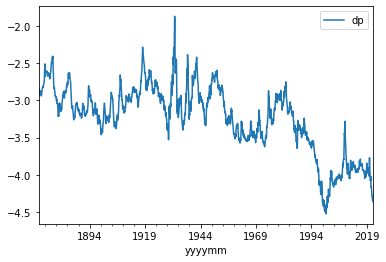

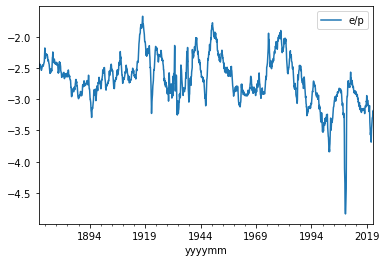

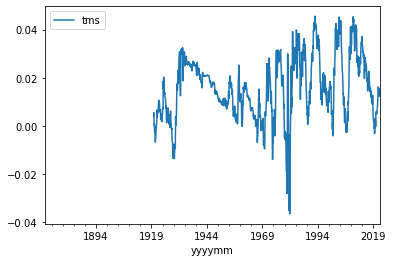

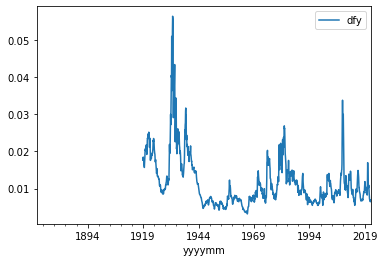

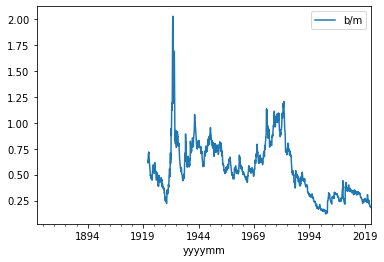

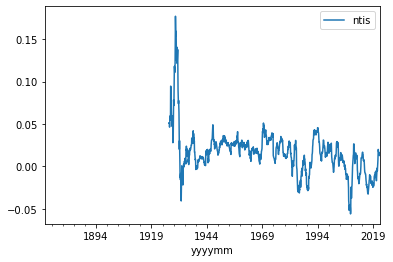

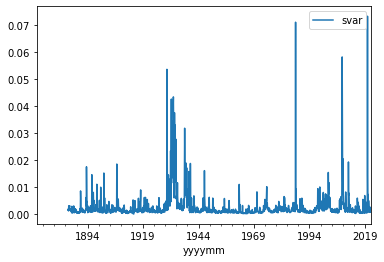

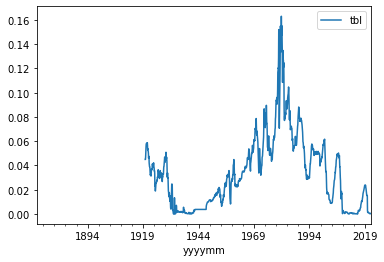

In [7]:
pre8.plot(x='yyyymm', y='dp')
pre8.plot(x='yyyymm', y='e/p')
pre8.plot(x='yyyymm', y='tms')
pre8.plot(x='yyyymm', y='dfy')
pre8.plot(x='yyyymm', y='b/m')
pre8.plot(x='yyyymm', y='ntis')
pre8.plot(x='yyyymm', y='svar')
pre8.plot(x='yyyymm', y='tbl')

## merge

In [8]:
raw['yyyymm'] = raw['DATE'].astype('str').str[:6]
raw['yyyymm'] = pd.to_datetime(raw['yyyymm'], format='%Y%m')

In [9]:
raw['yyyymm'].describe()

count                 4345508
unique                   1140
top       1997-12-01 00:00:00
freq                     9140
first     1926-01-01 00:00:00
last      2020-12-01 00:00:00
Name: yyyymm, dtype: object

In [10]:
pre8['yyyymm'].describe()

count                    1812
unique                   1812
top       1871-01-01 00:00:00
freq                        1
first     1871-01-01 00:00:00
last      2021-12-01 00:00:00
Name: yyyymm, dtype: object

In [11]:
rawm = pd.merge(raw, pre8, how="left", on="yyyymm")

In [12]:
rawm.drop(['yyyymm'], axis=1, inplace=True)
rawm.head()

,permno,DATE,mvel1,RET,prc,SHROUT,beta,betasq,chmom,dolvol,...,bm,bm_ia,b/m,tbl,ntis,svar,dp,e/p,tms,dfy
0,10006,19260130,65400.0,0.032732,110.2500,600,NaN,NaN,NaN,NaN,...,NaN,NaN,0.387671,0.0349,NaN,0.000857,-3.04315,-2.322403,0.0025,0.0127
1,10022,19260130,11200.0,0.017857,57.0000,200,NaN,NaN,NaN,NaN,...,NaN,NaN,0.387671,0.0349,NaN,0.000857,-3.04315,-2.322403,0.0025,0.0127
2,10030,19260130,23400.0,0.161667,174.2500,156,NaN,NaN,NaN,NaN,...,NaN,NaN,0.387671,0.0349,NaN,0.000857,-3.04315,-2.322403,0.0025,0.0127
3,10049,19260130,18500.0,0.141892,83.5000,250,NaN,NaN,NaN,NaN,...,NaN,NaN,0.387671,0.0349,NaN,0.000857,-3.04315,-2.322403,0.0025,0.0127
4,10057,19260130,6125.0,-0.035714,11.8125,500,NaN,NaN,NaN,NaN,...,NaN,NaN,0.387671,0.0349,NaN,0.000857,-3.04315,-2.322403,0.0025,0.0127


In [13]:
rawm.to_csv("complete_dataset.csv", index=None)

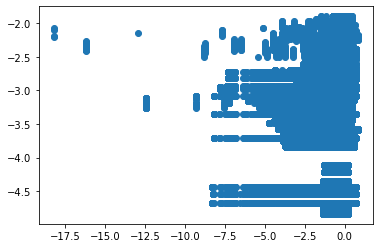

In [15]:
plt.scatter(rawm['ep'],rawm['e/p'])

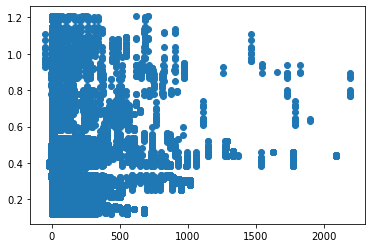

In [16]:
plt.scatter(rawm['bm'],rawm['b/m'])